In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import interpolate
import os

import snpy as sn
import glob
import numpy as np 
from scipy import interpolate

/Users/m1/opt/anaconda3/lib/python3.10/site-packages/snpy/filters/__init__.py:742: RuntimeWarning: invalid value encountered in log10
  newf.zp = 16.84692 + 2.5*num.log10(


In [2]:
sn.__version__

'2.6.0'

In [3]:
file='ZTF18aaiykoz.txt'

#ZTF18aaiykoz.txt
#ZTF18aahvndq.txt
#ZTF18aailmnv.txt
#ZTF18aaisqmw.txt

print('############################################################################################## ',file)

s=sn.get_sn(file)
s.get_restbands()
restg='g'
restr='r'

try: 
    s.ztfg.template(method='spline', task=0, s=10*len(s.ztfg.mag))
except:
    toy=0
try: 
    s.ztfr.template(method='spline', task=0, s=10*len(s.ztfr.mag))
except:
    toy=0
try: 
    s.ztfi.template(method='spline', task=0, s=10*len(s.ztfi.mag))
except:
    toy=0        

##############################################################################################  ZTF18aaiykoz.txt
Error:  could not load pickle file ZTF18aaiykoz.txt


## OPTION 1: H3 and maxmodel

--------------------------------------------------------------------------------
SN  ZTF18aaiykoz
z = 0.0304          zcmb = 0.0306          ra=239.49784         dec= 40.03390 
Data in the following bands: ztfg,  ztfr,  ztfi,  
Fit results (if any):
   st = 1.100  +/-  0.006  +/- 0.030 (sys)
   Tmax = 59023.693  +/-  0.024  +/- 0.340 (sys)
   gmax = 16.047  +/-  0.002  +/- 0.014 (sys)
   rmax = 16.168  +/-  0.003  +/- 0.022 (sys)
   imax = 16.839  +/-  0.004  +/- 0.022 (sys)
ZTF18aaiykoz.txt primer fit fail


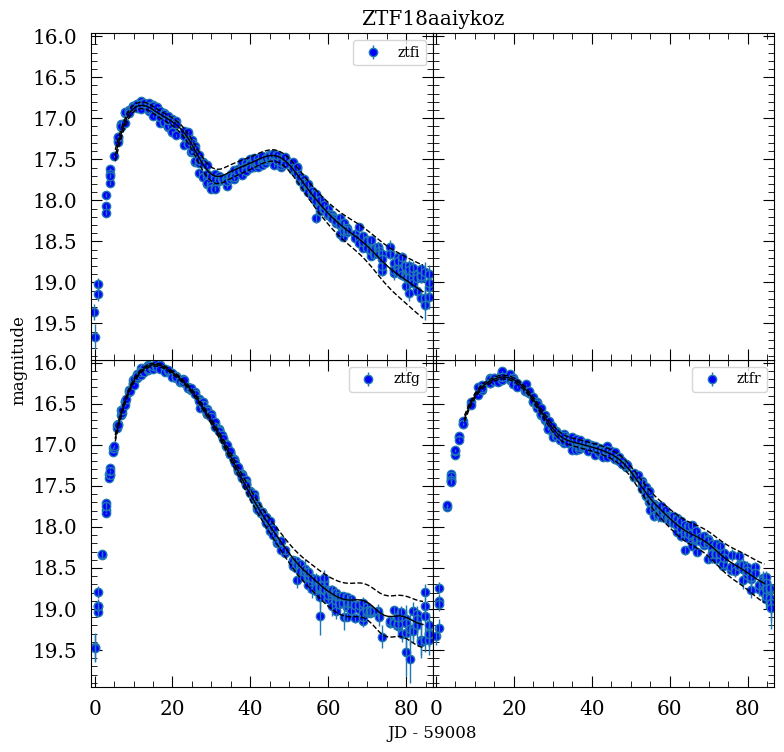

In [4]:
try: 
    s.choose_model('max_model', stype='st')  #ebv_model2   # dm15
    s.k_version = 'H3'  # 91bg
    s.restbands['ztfg']=restg
    s.restbands['ztfr']=restr
    s.fit(gen=3)
    s.summary()
    snTmax,esnTmax=s.Tmax,s.e_Tmax
    s.plot(outfile=s.name+'_O1_maxmodel_plot.pdf')
except:
    toy=0
    print(file,'first fit fail')  
    s.st=np.nan
    s.e_st=np.nan
    s.rchisq=np.nan   
s.EBVhost=np.nan
s.e_EBVhost=np.nan

## OPTION 2: H3 ebvmodel2 if possible

In [ ]:
 try: 
     s.choose_model('max_model', stype='st')
     s.k_version = 'H3'
     s.restbands['ztfg']=restg
     s.restbands['ztfr']=restr
     s.fit(gen=3)
     s.summary()
     snTmax,esnTmax=s.Tmax,s.e_Tmax
     s.plot(outfile=s.name+'_O2_maxmodel_plot.pdf')
 except:
     toy=0
     print(file,'first fit fail')  
     s.st=np.nan
     s.e_st=np.nan
     s.rchisq=np.nan   
 try:        
     s.choose_model('EBV_model2', stype='st')
     s.k_version = 'H3'
     s.restbands['ztfg']=restg
     s.restbands['ztfr']=restr            
     s.fit(gen=3)
     s.summary()  
     s.plot(outfile=s.name+'_O2_EBVmodel2_plot.pdf')
 except:
     print(file,'********** NOT WORKING ***********')
     s.st=np.nan
     s.e_st=np.nan
     s.EBVhost=np.nan
     s.e_EBVhost=np.nan
     s.rchisq=np.nan

# OPTION 3: 91bg template if st>0.6 all maxmodel

In [ ]:
try: 
    s.choose_model('max_model', stype='st')
    s.k_version = 'H3'
    s.restbands['ztfg']=restg
    s.restbands['ztfr']=restr
    s.fit(gen=3)
    s.summary()
    snTmax,esnTmax=s.Tmax,s.e_Tmax
    s.plot(outfile=s.name+'_O3_maxmodel_plot.pdf')
except:
    toy=0
    print(file,'first fit fail')
    s.st=np.nan
    s.e_st=np.nan
    s.rchisq=np.nan
s.EBVhost=np.nan
s.e_EBVhost=np.nan        
if (s.st>0)&(s.st<0.6):
    is91bg=1
    try: 
        s.choose_model('max_model', stype='st')
        s.k_version = '91bg'
        s.restbands['ztfg']=restg
        s.restbands['ztfr']=restr            
        s.fit(gen=3)
        s.summary()
        snTmax,esnTmax=s.Tmax,s.e_Tmax
        s.plot(outfile=s.name+'_O3_maxmodel_91bg_plot.pdf')
    except:
        toy=0
        s.st=np.nan
        s.e_st=np.nan
        s.rchisq=np.nan
    s.EBVhost=np.nan
    s.e_EBVhost=np.nan


# OPTION 4: 91bg template if st>0.6 with EBV2model if possible

In [ ]:
flag=1
try: 
    s.choose_model('max_model', stype='st')
    s.k_version = 'H3'
    s.restbands['ztfg']=restg
    s.restbands['ztfr']=restr
    s.fit(gen=3)
    s.summary()
    snTmax,esnTmax=s.Tmax,s.e_Tmax
    s.plot(outfile=s.name+'_O4_maxmodel_plot.pdf')
except:
    toy=0
    print(file,'first fit fail')
    try:        
        s.choose_model('EBV_model2', stype='st')
        s.k_version = 'H3'
        s.restbands['ztfg']=restg
        s.restbands['ztfr']=restr            
        s.fit(gen=3)
        s.summary()  
        s.plot(outfile=s.name+'_O4_EBVmodel2_plot.pdf')
    except:
        print(file,'********** NOT WORKING ***********')
        s.st=np.nan
        s.e_st=np.nan
        s.EBVhost=np.nan
        s.e_EBVhost=np.nan
        s.rchisq=np.nan
        flag=1
print(s.st)    
if (flag==0)&(s.st>0)&(s.st<0.6):
    is91bg=1
    try: 
        s.choose_model('max_model', stype='st')
        s.k_version = '91bg'
        s.restbands['ztfg']=restg
        s.restbands['ztfr']=restr            
        s.fit(gen=3)
        s.summary()
        snTmax,esnTmax=s.Tmax,s.e_Tmax
        s.plot(outfile=s.name+'_O4_maxmodel_91bg_plot.pdf')
    except:
        toy=0
        print('third fit max_model 91bg fails')
    
    try:
        s.choose_model('EBV_model2', stype='st')
        s.k_version = '91bg'
        s.restbands['ztfg']=restg
        s.restbands['ztfr']=restr            
        s.fit(gen=3)
        if snTmax != np.nan: 
            s.fit(Tmax=snTmax,gen=3)
        else:
            s.fit(gen=3)
        s.summary()  
        s.plot(outfile=s.name+'_O4_EBVmodel2_91bg_plot.pdf')
    except:
        print(file,' no EBV_model2 91bg fit')
        s.st=np.nan
        s.e_st=np.nan
        s.EBVhost=np.nan
        s.e_EBVhost=np.nan
        s.rchisq=np.nan
else:
    try:        
        s.choose_model('EBV_model2', stype='st')
        s.k_version = 'H3'
        s.restbands['ztfg']=restg
        s.restbands['ztfr']=restr             
        s.fit(gen=3)
        if snTmax != np.nan: 
            s.fit(Tmax=snTmax,gen=3)
        else:
            s.fit(gen=3)
        s.summary()  
        s.plot(outfile=s.name+'_O4_EBVmodel2_plot.pdf')
    except:
        print(file,' no EBV_model2 H3 fit')
        s.st=np.nan
        s.e_st=np.nan
        s.EBVhost=np.nan
        s.e_EBVhost=np.nan
        s.rchisq=np.nan

3.833212 2.5814962545454545 1.7177255 1.3439257777777776


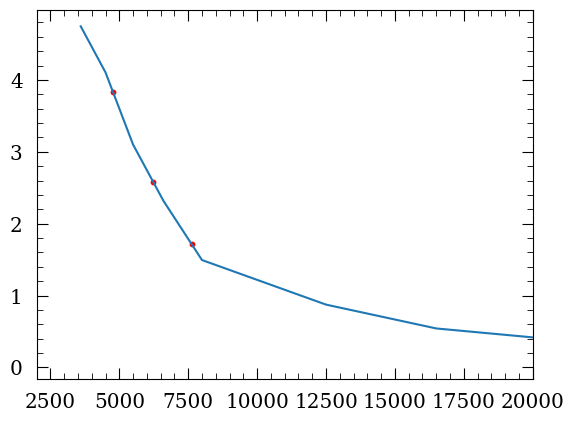

In [5]:
# Fitzpatrick 1999: https://iopscience.iop.org/article/10.1086/316293/pdf
# V 3.1, R 2.32, I I 1.57  
# gri interpolated from: http://www.astro.sunysb.edu/metchev/PHY517_AST443/extinction_lab.pdf
# extinction laws: http://www.astro.sunysb.edu/metchev/PHY517_AST443/extinction_lab.pdf
# filter eff wave: https://www.aavso.org/filters

x=np.array([3600,4500,5500,6600,8000,12500,16500,22000,35000,48000])
y=np.array([1.531,1.324,1,0.748,0.482, 0.282, 0.175, 0.112, 0.058, 0.023])*3.1
n=['U','B','V','R','I','J','H','K','L','M']
law=interpolate.interp1d(x,y) #interpolation Filtre m2

g=4770	 
r=6230.1
i=7620.5
z=9090.7

print(law(g),law(r),law(i),law(z))
plt.plot(x,y)
plt.scatter(g,law(g),c='r',s=10)
plt.scatter(r,law(r),c='r',s=10)
plt.scatter(i,law(i),c='r',s=10)
plt.xlim(2000,20000)
plt.show()

In [13]:
try:
    gkc = interpolate.interp1d(s.ztfg.MJD,s.ks['ztfg'])
    gkcor = gkc(s.ztfg.Tmax)
    g_ebvcorr = s.ztfg.Mmax - 3.83*s.EBVgal - gkcor
    gTmax = s.ztfg.Tmax
    egTmax = s.ztfg.e_Tmax
    gMmax = s.ztfg.Mmax
    egMmax = s.ztfg.e_Mmax
except:
    gkcor = np.nan
    g_ebvcorr = np.nan
    gTmax = np.nan
    egTmax = np.nan
    gMmax = np.nan
    egMmax = np.nan
try:       
    rkc=interpolate.interp1d(s.ztfr.MJD,s.ks['ztfr'])
    rkcor= rkc(s.ztfr.Tmax)
    r_ebvcorr = s.ztfr.Mmax - 2.58*s.EBVgal - rkcor
    rTmax = s.ztfr.Tmax
    erTmax = s.ztfr.e_Tmax
    rMmax = s.ztfr.Mmax
    erMmax = s.ztfr.e_Mmax
except:
    r_ebvcorr = np.nan
    rkcor = np.nan
    rTmax = np.nan
    erTmax = np.nan
    rMmax = np.nan
    erMmax = np.nan
try:
    ikc=interpolate.interp1d(s.ztfi.MJD,s.ks['ztfi'])
    ikcor= ikc(s.ztfi.Tmax)
    i_ebvcorr = s.ztfi.Mmax - 1.72*s.EBVgal - ikcor
    iTmax = s.ztfi.Tmax
    eiTmax = s.ztfi.e_Tmax
    iMmax = s.ztfi.Mmax
    eiMmax = s.ztfi.e_Mmax
except:
    i_ebvcorr = np.nan
    ikcor = np.nan
    iTmax = np.nan
    eiTmax = np.nan
    iMmax = np.nan
    eiMmax = np.nan

SN           z        Tmax     eTmax gTmax   egTmax rTmax   erTmax iTmax   eiTmax gMmax  egMmax rMmax  erMmax iMmax  eiMmax gMcor   gkcor rMcor   rkcor iMcor   ikcor st    est  EBVhost eEBVhost  

ZTF18aaiykoz 0.030431 59023.69  0.02 59024.05  2.20 59024.47  1.01 59020.45  0.55 16.044  0.166 16.159  0.065 16.822  0.017 16.067 -0.073 16.151 -0.026 16.821 -0.021   nan   nan    nan    nan 



In [ ]:
print('SN           z        Tmax     eTmax gTmax   egTmax rTmax   erTmax iTmax   eiTmax gMmax  egMmax rMmax  erMmax iMmax  eiMmax gMcor   gkcor rMcor   rkcor iMcor   ikcor st    est  EBVhost eEBVhost  \n')
print('%10s %8.6f %8.2f %5.2f %8.2f %5.2f %8.2f %5.2f %8.2f %5.2f %6.3f %6.3f %6.3f %6.3f %6.3f %6.3f %6.3f %6.3f %6.3f %6.3f %6.3f %6.3f %5.3f %5.3f %6.3f %6.3f \n'%(s.name, s.z, snTmax, esnTmax, 
  gTmax, egTmax, rTmax, erTmax, iTmax, eiTmax, gMmax, egMmax, rMmax, erMmax, iMmax, eiMmax, g_ebvcorr, gkcor, r_ebvcorr, rkcor, i_ebvcorr, ikcor, 
  s.st,s.e_st,s.EBVhost,s.e_EBVhost))
